
# **Analysis of Technical Indicators**
> By Srishti Singh



**RSI - Relative Strangth Index**

In [1]:
# Importing the libraries
!pip install pandas_ta
import pandas_ta as pta
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yfin
yfin.pdr_override() # This is crucial to avioid list constraints
import math
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=da3d602c53c194db9449cdbb871de47950f57bf537a1be9875e867920dcd9429
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)

In [3]:
def get_data(ticker):
  asset = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
  asset.reset_index(inplace = True)
  return asset

meta = get_data('META')
meta

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,137.139999,139.619995,136.100006,138.610001,138.610001,27723100
1,2022-10-04,140.490005,142.389999,139.339996,140.279999,140.279999,34670700
2,2022-10-05,138.240005,140.210007,134.779999,138.979996,138.979996,27979300
3,2022-10-06,137.720001,141.449997,136.600006,139.070007,139.070007,36231100
4,2022-10-07,136.759995,138.289993,132.440002,133.449997,133.449997,33214800
...,...,...,...,...,...,...,...
246,2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
247,2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800
248,2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22167100
249,2023-09-29,307.380005,310.640015,299.359985,300.209991,300.209991,25356600


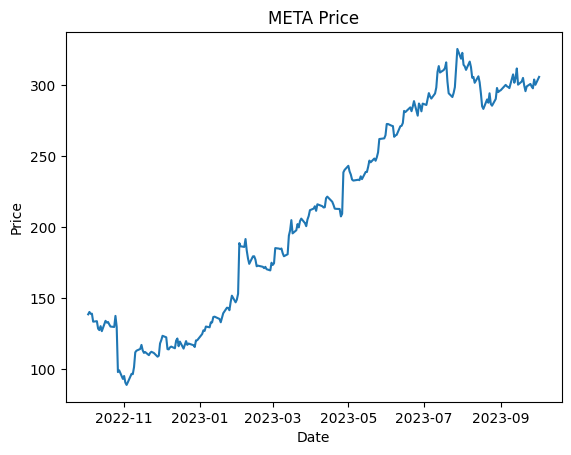

In [4]:
plt.plot(meta['Date'], meta['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('META Price')
plt.show()

In [5]:
# Now we can start calculating the RSI values
def rsi(df, periods = 14, ema = True):
    close_delta = meta['Adj Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower = 0)
    down = -1 * close_delta.clip(upper = 0)

    if ema == True:
	     # Using EWA
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Using SMA
        ma_up = up.rolling(window = periods, adjust = False).mean()
        ma_down = down.rolling(window = periods, adjust = False).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

rsi(meta)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
246    49.235932
247    48.129084
248    53.828083
249    50.243952
250    55.031509
Name: Adj Close, Length: 251, dtype: float64

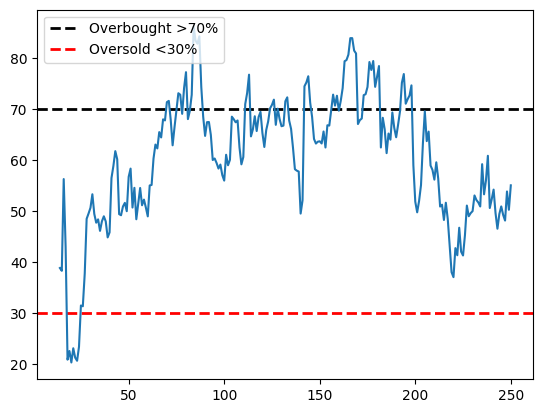

In [6]:
final = pta.rsi(meta['Adj Close'], length = 14)
plt.axhline(y = 70, color = 'black', linestyle = '--', linewidth = 2, label = 'Overbought >70%')
plt.axhline(y = 30, color = 'red', linestyle = '--', linewidth = 2, label = 'Oversold <30%')
plt.legend(loc = 'upper left')
plt.plot(final)